# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email ID :</u> advaitchavan135@gmail.com
# CDAC PGDAI MACHINE LEARNING ASSIGNMENT__2

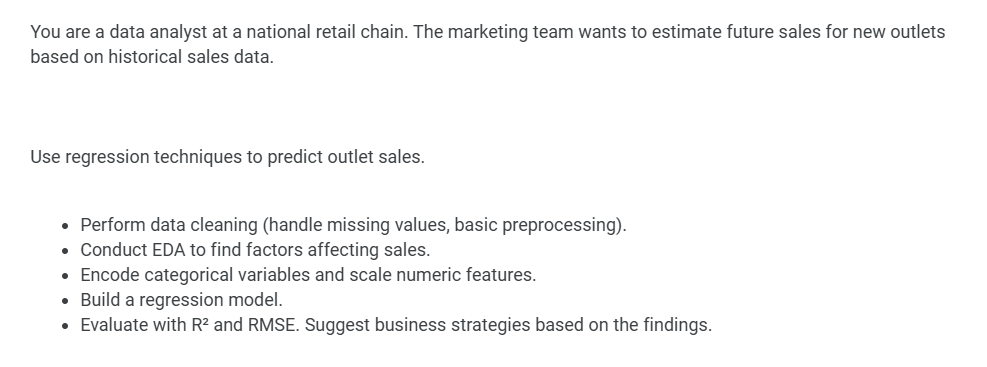

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 1. Load the dataset

In [4]:
df = pd.read_csv('Train.csv')
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 2. Data Cleaning

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [9]:
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [10]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [11]:
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [12]:
for col in num_cols:
    df = remove_outliers(df, col)

In [13]:
print("Data cleaning completed. Check for missing values again:")
df.isnull().sum()

Data cleaning completed. Check for missing values again:


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

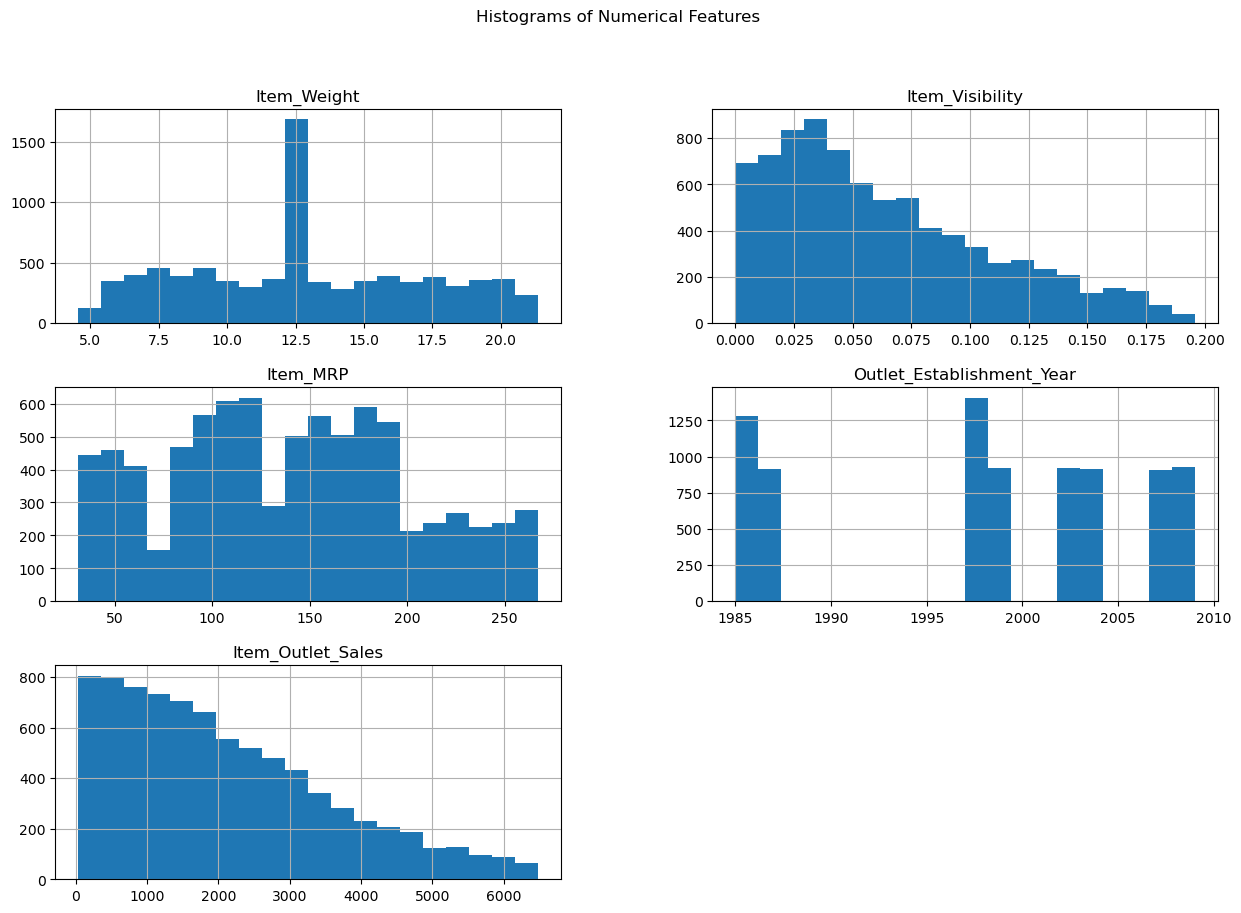

In [14]:
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

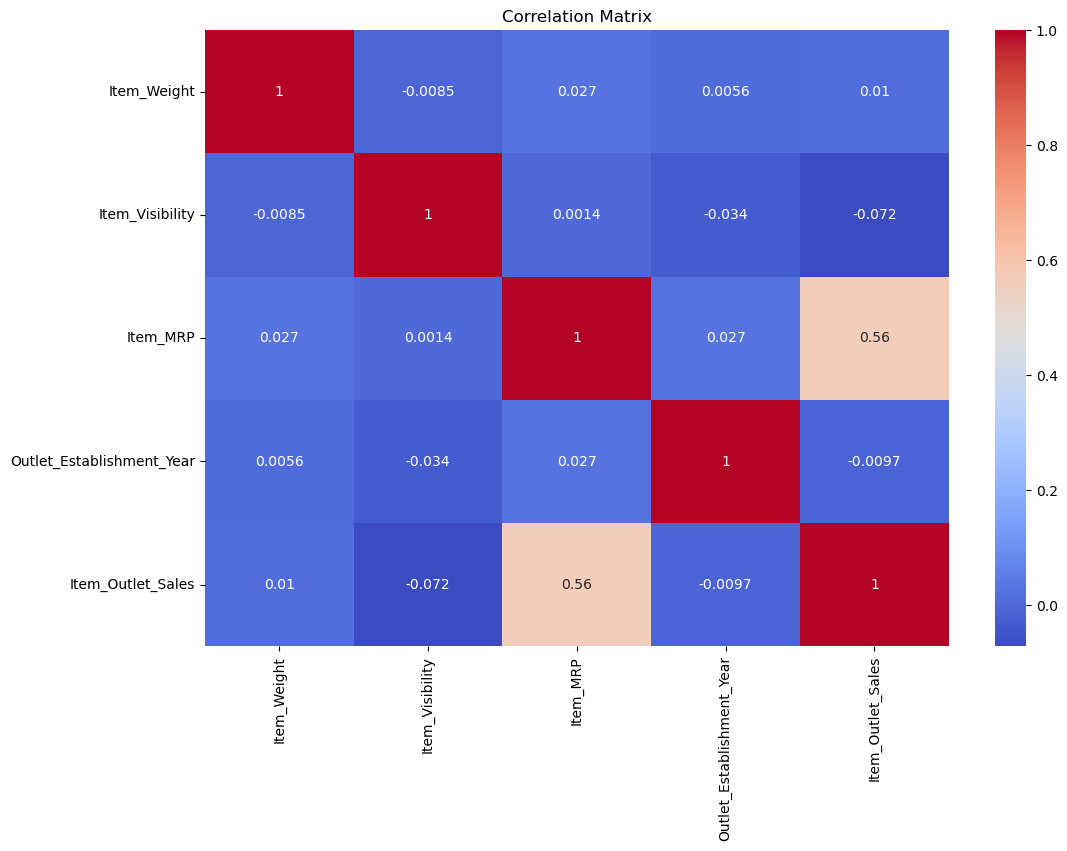

In [15]:
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

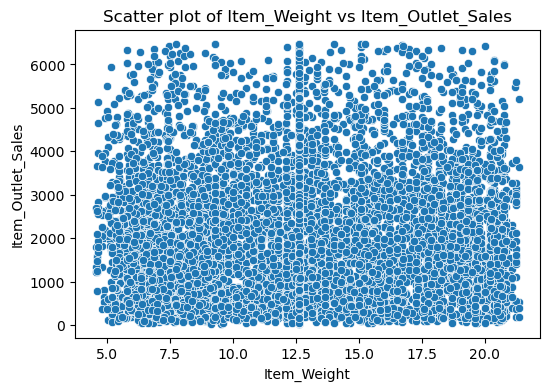

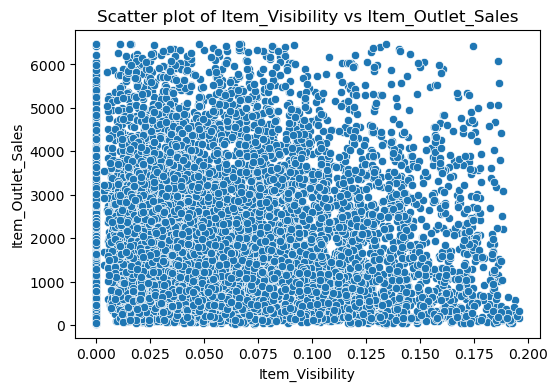

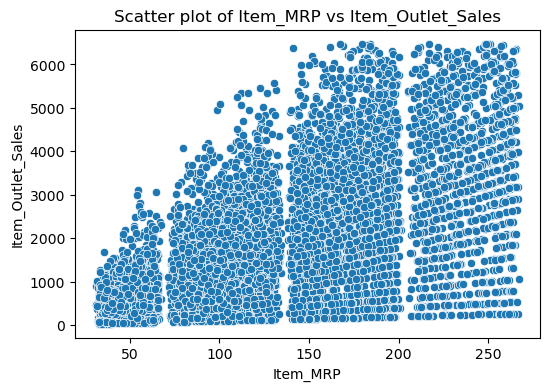

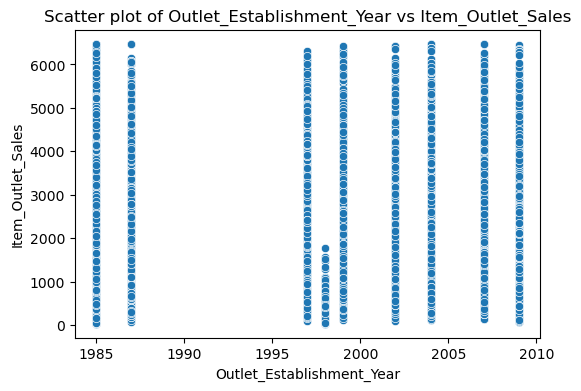

In [19]:
target_column = 'Item_Outlet_Sales'
if target_column in df.columns:
    for col in num_cols:
        if col != target_column:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[col], y=df[target_column])
            plt.title(f"Scatter plot of {col} vs {target_column}")
            plt.xlabel(col)
            plt.ylabel(target_column)
            plt.show()

## 4. Feature Engineering

In [20]:
if target_column not in df.columns:
    raise ValueError(f"The target column '{target_column}' is not in the dataset.")

In [21]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [22]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

## 5. Model Building and Evaluation

In [46]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Item_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [49]:
y_pred = pipeline.predict(X_val)

In [50]:
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [51]:
print("Random Forest Model Evaluation on Validation Data:")
print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Random Forest Model Evaluation on Validation Data:
R²: 0.52
RMSE: 1056.45


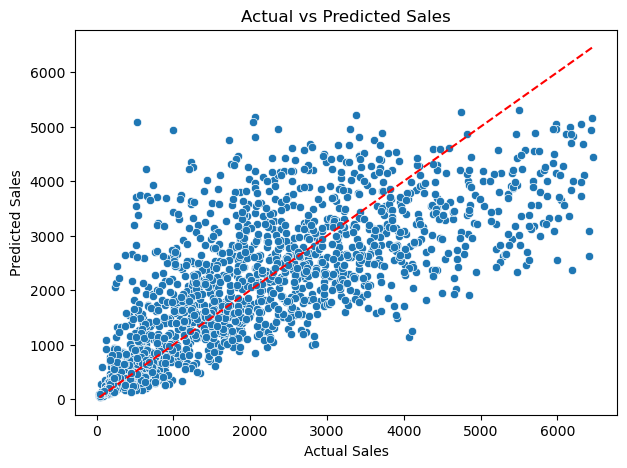

In [52]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()

### Alignment with the Red Dashed Line: The red dashed line represents perfect predictions—where actual sales would exactly equal the predicted sales. The closer the blue dots (each representing an individual observation) are to this line, the more accurate your model is. A tight clustering around the line indicates that the predictions closely mirror real sales figures.

### Spread Across the Range: With both axes spanning from 0 to 6000, the plot captures a broad range of sales values. This allows you to evaluate the model’s performance across low, medium, and high sales regimes. Consistent performance across this wide range is a good sign of model robustness.

### Identifying Systematic Patterns: If there are areas where the points consistently fall above or below the red line, it might suggest systematic underprediction or overprediction in those segments. Such patterns can provide insights into potential model improvements, like exploring nonlinear relationships or including additional predictors.

### Outliers and Variability: Scattered points that deviate significantly from the line may indicate outliers or instances of higher prediction error. Investigating these cases could uncover data quality issues or reveal unique factors affecting sales that aren’t captured by the current model.

In [54]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

In [55]:
importances = pipeline.named_steps['regressor'].feature_importances_

In [56]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [57]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

Top 10 Feature Importances:
                                   Feature  Importance
2                            num__Item_MRP    0.404485
1595        cat__Outlet_Type_Grocery Store    0.204345
1                     num__Item_Visibility    0.062254
0                         num__Item_Weight    0.036101
3           num__Outlet_Establishment_Year    0.030173
1584         cat__Outlet_Identifier_OUT027    0.015004
1598    cat__Outlet_Type_Supermarket Type3    0.014861
1569  cat__Item_Type_Fruits and Vegetables    0.004627
1586         cat__Outlet_Identifier_OUT045    0.004478
1588         cat__Outlet_Identifier_OUT049    0.004086


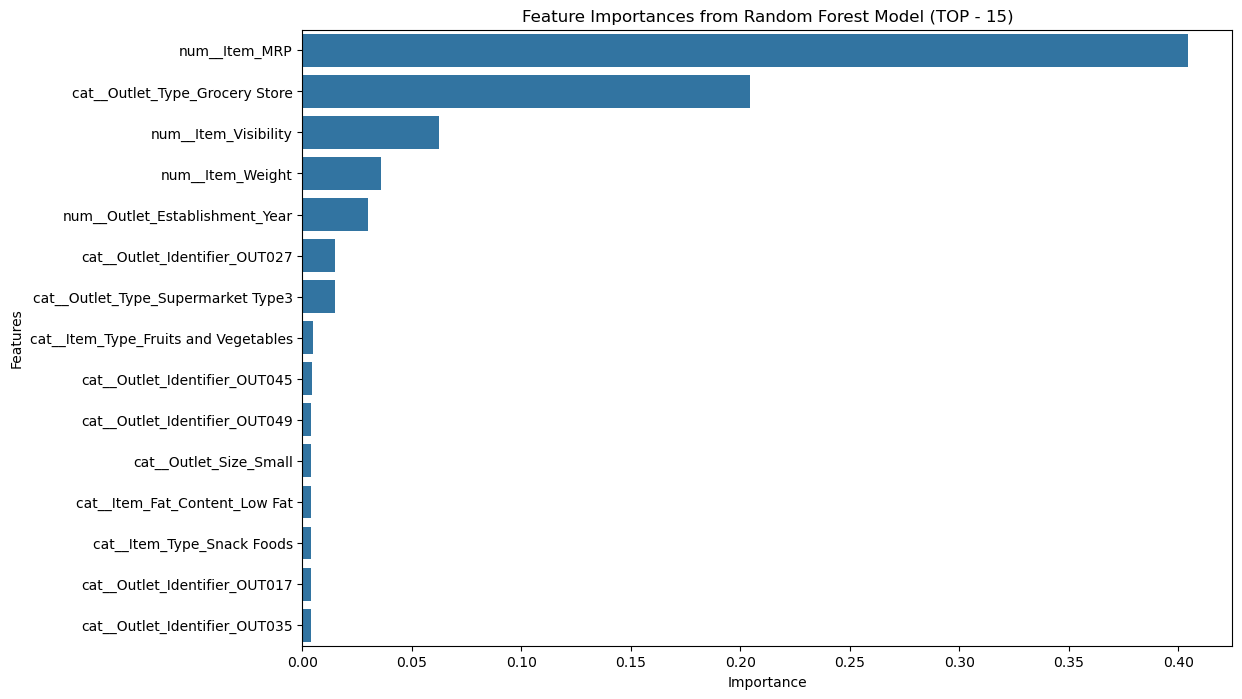

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title("Feature Importances from Random Forest Model (TOP - 15)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## 6. Business Strategies Based on Model Findings

In [53]:
print("\nBusiness Strategies Based on Model Findings:")
print("1. Targeted Market Expansion: Prioritize new outlets in regions with the best sales predictors.")
print("2. Optimized Promotional Campaigns: Align marketing efforts with periods of anticipated high sales.")
print("3. Efficient Resource Allocation: Invest more resources in outlets with high predicted sales.")
print("4. Customized Store Offerings: Tailor products and services to local customer demographics.")
print("5. Continuous Monitoring: Regularly update the model with fresh data to keep strategies current.")


Business Strategies Based on Model Findings:
1. Targeted Market Expansion: Prioritize new outlets in regions with the best sales predictors.
2. Optimized Promotional Campaigns: Align marketing efforts with periods of anticipated high sales.
3. Efficient Resource Allocation: Invest more resources in outlets with high predicted sales.
4. Customized Store Offerings: Tailor products and services to local customer demographics.
5. Continuous Monitoring: Regularly update the model with fresh data to keep strategies current.
